In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
df = pd.read_html('https://fbref.com/en/comps/10/Championship-Stats',header=1)[18]

In [10]:
df = df[['Squad','Poss','90s','Touches','Att 3rd']]

In [12]:
df.rename(columns={'Squad':'Team'},inplace=True)

C:\Users\dmsta\AppData\Local\Temp\ipykernel_22316\1617149880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Squad':'Team'},inplace=True)


In [13]:
df['Badge'] = df['Team'].apply(lambda x: f"C:/Users/George/Documents/Football Analytics/Team Logos/{x.lower()}_logo.png")

C:\Users\dmsta\AppData\Local\Temp\ipykernel_22316\198423750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Badge'] = df['Team'].apply(lambda x: f"C:/Users/George/Documents/Football Analytics/Team Logos/{x.lower()}_logo.png")


In [15]:
df['Att 3rd %'] = (df['Att 3rd'] / df['Touches']) * 100

C:\Users\dmsta\AppData\Local\Temp\ipykernel_22316\1242633228.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Att 3rd %'] = (df['Att 3rd'] / df['Touches']) * 100


In [17]:
df['Att 3rd %'] = df['Att 3rd %'].round(2)

C:\Users\dmsta\AppData\Local\Temp\ipykernel_22316\2981568467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Att 3rd %'] = df['Att 3rd %'].round(2)


In [18]:
df = pd.DataFrame(df)

C:\Users\dmsta\AppData\Local\Temp\ipykernel_22316\330529441.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm')


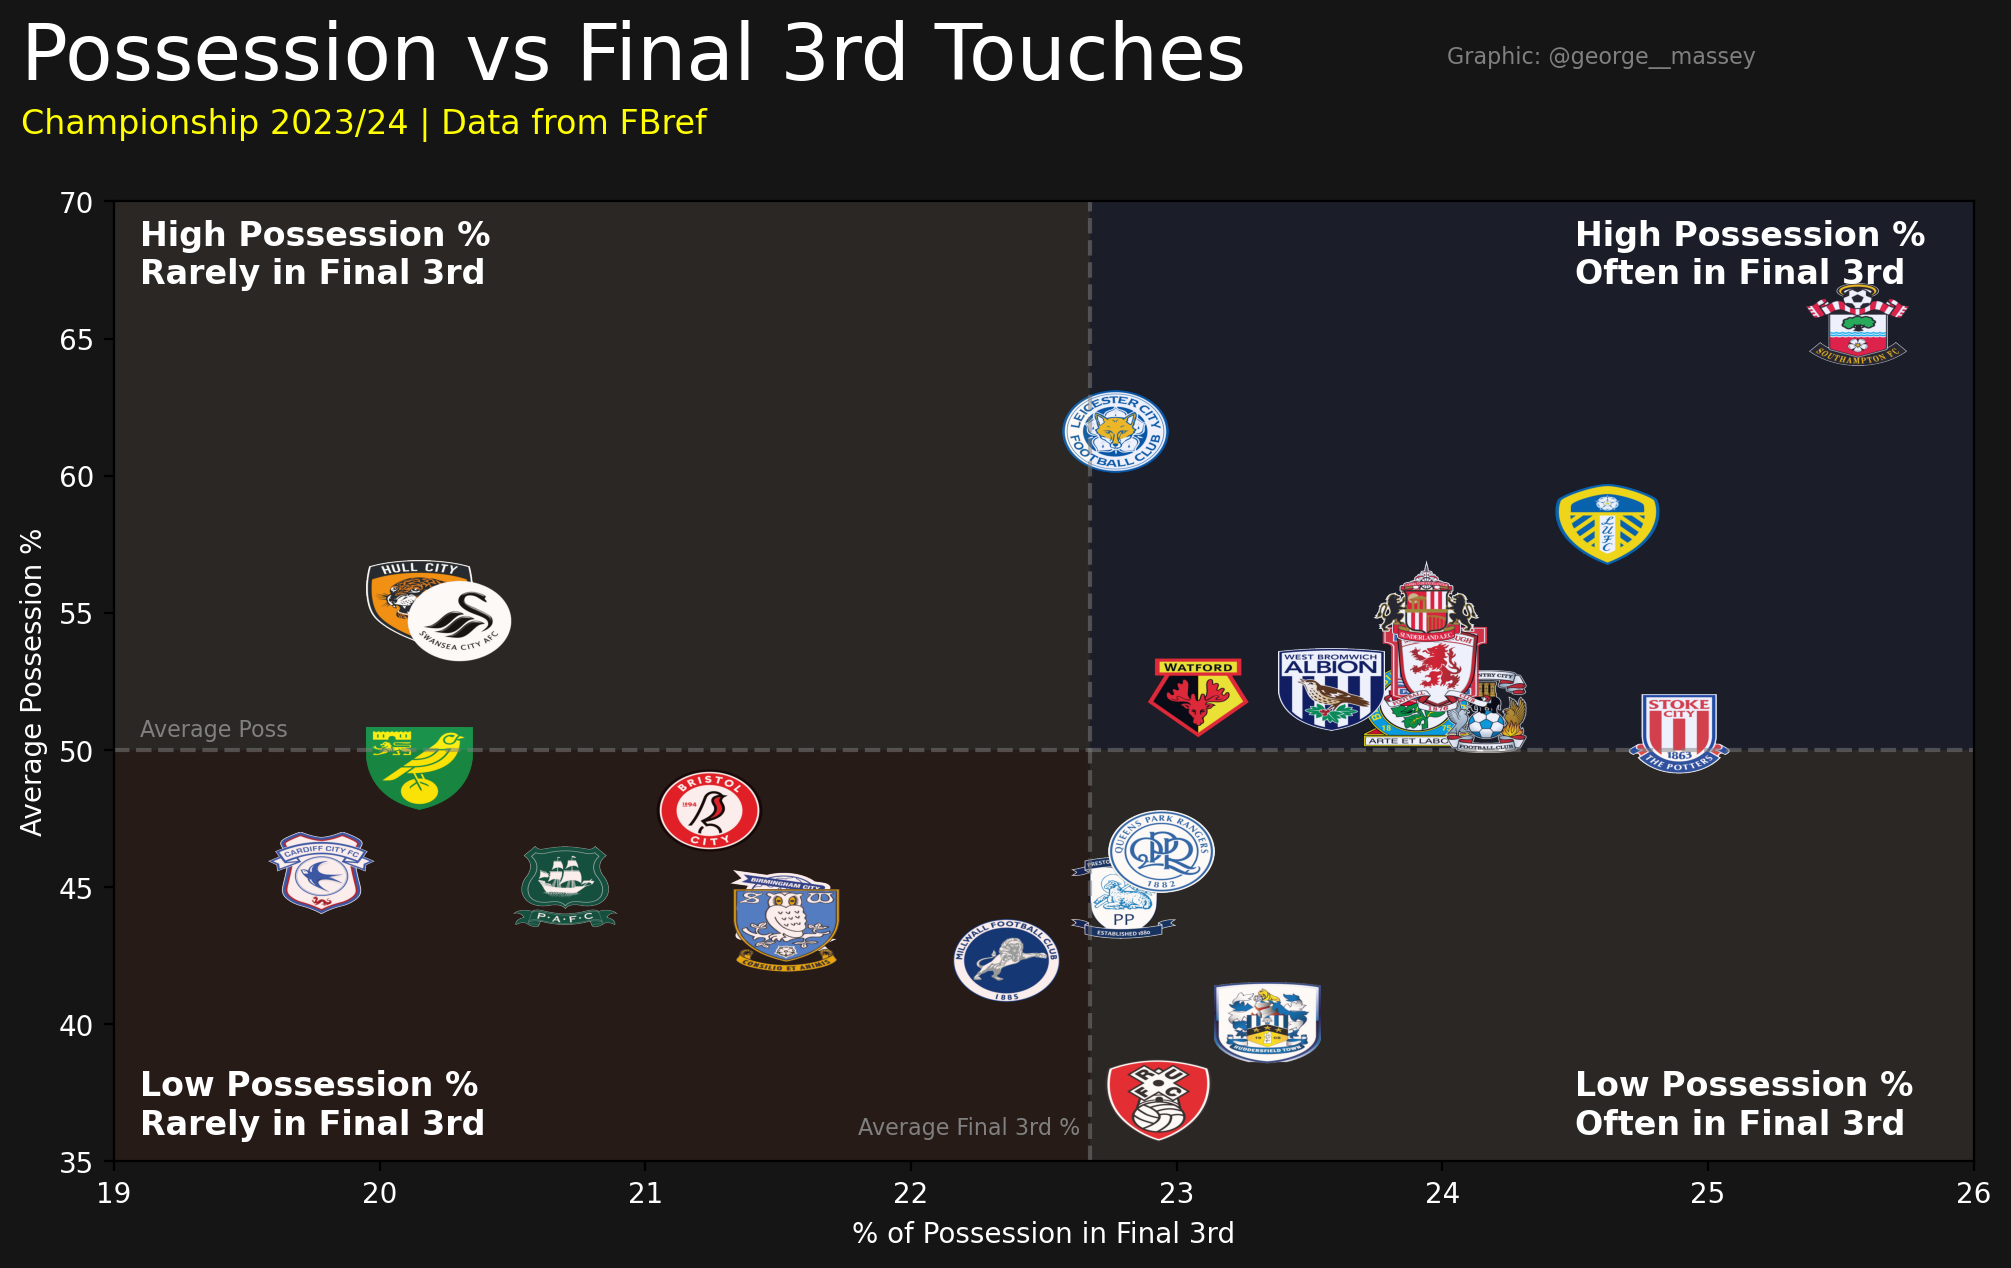

In [55]:
import matplotlib.patches as patches

plt.figure(figsize=(12, 8), dpi=200, facecolor='#141514')  # Set the facecolor to #141514

# Plot the badge at each point
for i, team in df.iterrows():
    badge = plt.imread(team['Badge'])
    plt.imshow(badge, extent=(team['Att 3rd %']-0.2, team['Att 3rd %']+0.2, team['Poss']-1.5, team['Poss']+1.5), aspect='auto', alpha=1)

# Add labels and title
plt.xlabel('% of Possession in Final 3rd', color='white')  # Set the xlabel color to white
plt.ylabel('Average Possession %', color='white')  # Set the ylabel color to white
plt.yticks([35,40,45,50,55,60,65,70], color='white')  # Set the yticks color to white
plt.xticks([19,20,21,22,23,24,25,26], color='white')  # Set the xticks color to white
#plt.gca().invert_xaxis()  # Invert the x-axis
# Adjust the plot limits if needed
# Calculate the average value
average_value = df['Poss'].mean()
average_value2 = df['Att 3rd %'].mean()
# Draw a line from the y-axis at the average value
plt.axhline(average_value, color='grey', linestyle='--', alpha=0.5)
plt.axvline(average_value2, color='grey', linestyle='--', alpha=0.5)

# Set the colors for each quadrant
#colors = ['green', 'yellow', 'blue', 'red']
import matplotlib.cm as cm

# Set the colors for each quadrant using a colormap
cmap = cm.get_cmap('coolwarm')
colors = [cmap(0.1), cmap(0.3), cmap(0.6), cmap(0.9)]

# Create the rectangles
rect1 = patches.Rectangle((average_value2, average_value), width = df['Att 3rd %'].max()+2, height=df['Poss'].max(), facecolor=colors[0], alpha=0.1)
rect2 = patches.Rectangle((average_value2, 0), width=df['Att 3rd %'].max()+2,height= average_value, facecolor=colors[2], alpha=0.1)
rect3 = patches.Rectangle((df['Att 3rd %'].min()-3, average_value), average_value2 - (df['Att 3rd %'].min()-3), height=df['Poss'].max(), facecolor=colors[2], alpha=0.1)
rect4 = patches.Rectangle((df['Att 3rd %'].min()-3, 0), width=average_value2 - (df['Att 3rd %'].min()-3) , height=average_value, facecolor=colors[3], alpha=0.1)

# Add the rectangles to the plot
plt.gca().add_patch(rect1)
plt.gca().add_patch(rect2)
plt.gca().add_patch(rect3)
plt.gca().add_patch(rect4)
#plt.xlim(df['Att 3rd %'][::-1])
#plt.ylim(0, df['Poss'].max()+50)

# Set the ticks color to white
plt.xticks(color='white')
plt.yticks(color='white')

# Set the plot background color to #141514
plt.gca().set_facecolor('#141514')
# Add text box in each quadrant
plt.text(19.1, 67, 'High Possession %\nRarely in Final 3rd', color='white', fontsize=12, ha='left',weight='bold')
plt.text(19.1, 36, 'Low Possession %\nRarely in Final 3rd', color='white', fontsize=12, ha='left',weight='bold')
plt.text(24.5, 36, 'Low Possession %\nOften in Final 3rd', color='white', fontsize=12, ha='left',weight='bold')
plt.text(24.5, 67, 'High Possession %\nOften in Final 3rd', color='white', fontsize=12, ha='left',weight='bold')
plt.text(19.1,50.5, 'Average Poss', color='grey', fontsize=8)
plt.text(21.8,36, 'Average Final 3rd %', color='grey', fontsize=8)
plt.subplots_adjust(top=0.85, bottom=0.25)
plt.text(-0.05, 1.15, 'Possession vs Final 3rd Touches', color='white', fontsize=28, transform=plt.gca().transAxes, ha='left', va='center')
plt.text(0.8, 1.15, 'Graphic: @george__massey', color='grey', fontsize=8, transform=plt.gca().transAxes, ha='center', va='center')
plt.text(-0.05, 1.08, 'Championship 2023/24 | Data from FBref', color='yellow', fontsize=12, transform=plt.gca().transAxes, ha='left', va='center')
plt.show()